In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def compute_histogram(image, is_color=False, normalized=False):
    plt.figure()
    if is_color:
        channels = ('b', 'g', 'r')
        for i, col in enumerate(channels):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            if normalized:
                hist /= hist.sum()
            plt.plot(hist, color=col)
        plt.title('Color Image Histogram' + (' (Normalized)' if normalized else ''))
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        if normalized:
            hist /= hist.sum()
        plt.plot(hist, color='black')
        plt.title('Grayscale Image Histogram' + (' (Normalized)' if normalized else ''))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability' if normalized else 'Number of Pixels')
    plt.show()

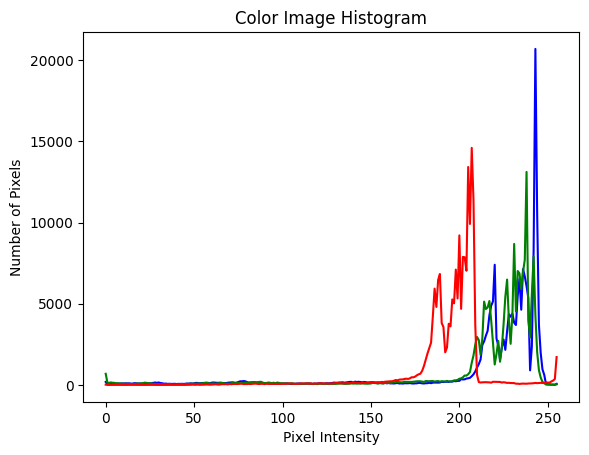

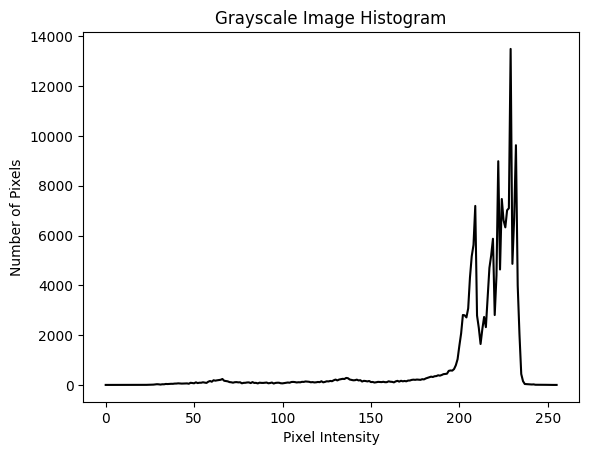

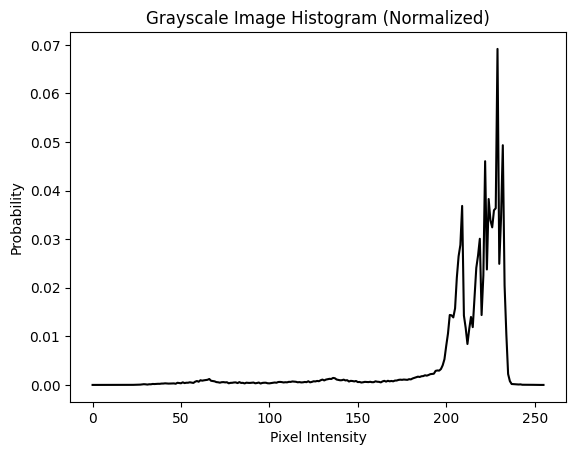

In [ ]:
img_color = cv2.imread('image.jpg')


compute_histogram(img_color, is_color=True)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

compute_histogram(img_gray, is_color=False)

compute_histogram(img_gray, is_color=False, normalized=True)

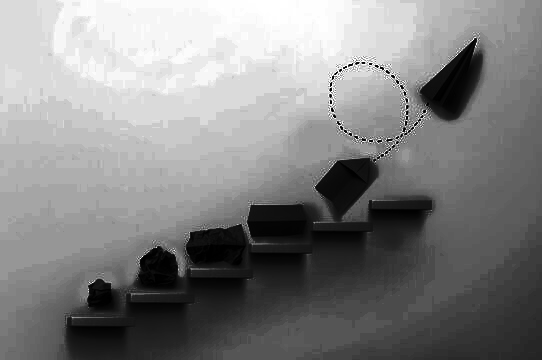

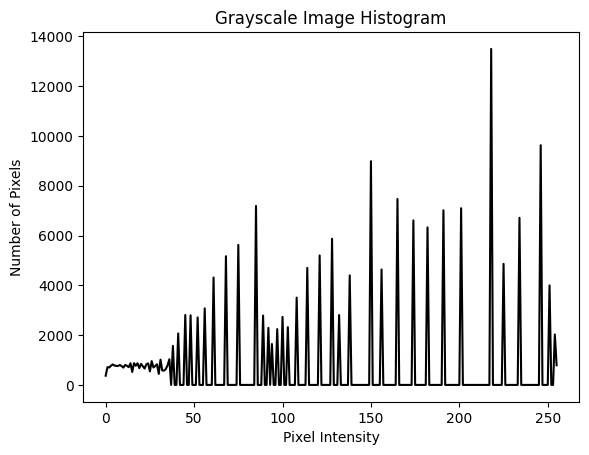

In [ ]:
'''histogram equalization'''
img_eq = cv2.equalizeHist(img_gray)
cv2_imshow(img_eq)
compute_histogram(img_eq, is_color=False)

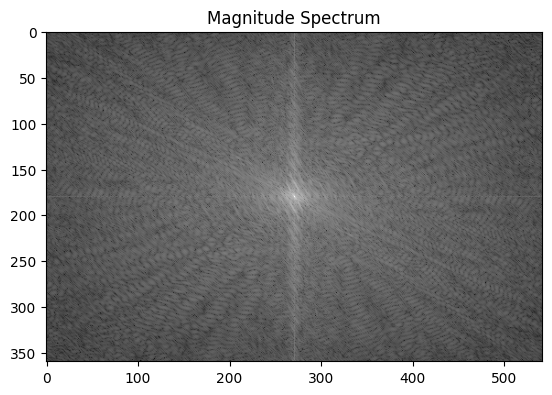

In [ ]:
def apply_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

dft, dft_shift, magnitude_spectrum = apply_fft(img_gray)
plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

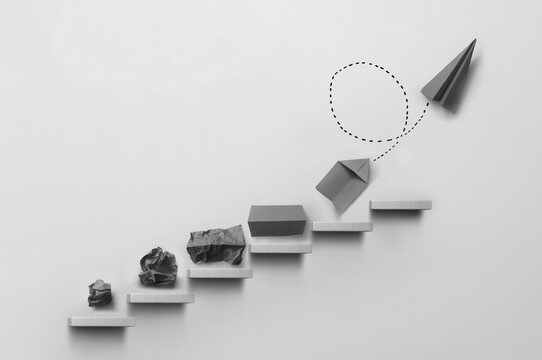

In [ ]:
def apply_ifft(dft):
    dft_ishift = np.fft.ifftshift(dft)
    img_back = np.fft.ifft2(dft_ishift)
    return np.abs(img_back)

img_reconstructed = apply_ifft(dft)
cv2_imshow(np.uint8(img_reconstructed))

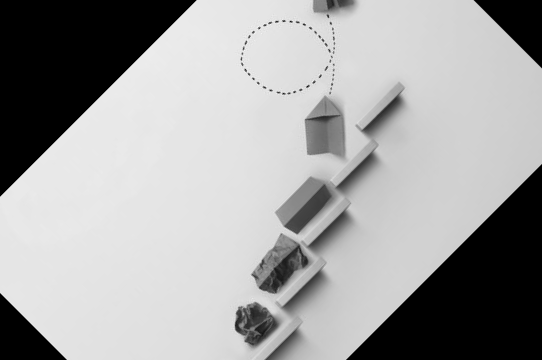

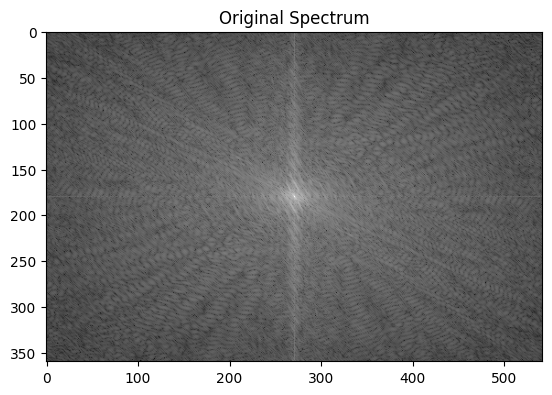

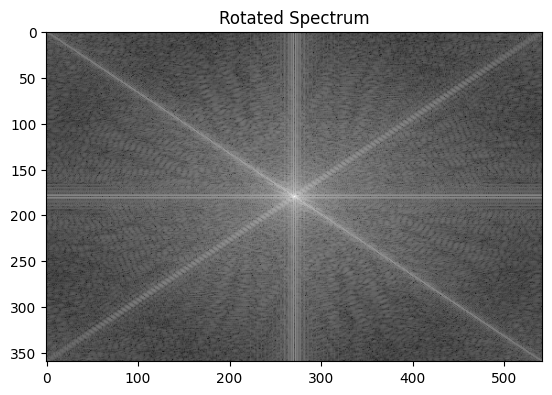

In [ ]:
def rotate_and_fft(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rot_matrix, (w, h))
    _, _, spectrum_original = apply_fft(image)
    _, _, spectrum_rotated = apply_fft(rotated_image)
    return rotated_image, spectrum_original, spectrum_rotated

rotated_img, spectrum_original, spectrum_rotated = rotate_and_fft(img_gray, 45)
cv2_imshow(rotated_img)
plt.figure()
plt.imshow(spectrum_original, cmap='gray')
plt.title('Original Spectrum')
plt.show()

plt.figure()
plt.imshow(spectrum_rotated, cmap='gray')
plt.title('Rotated Spectrum')
plt.show()